In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [2]:
# read in the data
df = pd.read_feather("../preprocessed_data/cleaned_yellow_19_3IQR.feather").drop('index', axis=1)

df

,tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance,PULocationID,DOLocationID,fare_amount,tip_amount,total_amount,time_used,avg_speed,final_amount
0,2019-10-01 00:29:01,2019-10-01 00:34:58,1.00,7,7,6.0,0.00,7.30,5.950000,10.084034,7.30
1,2019-10-01 00:06:02,2019-10-01 00:11:15,1.44,230,90,6.0,1.96,11.76,5.216667,16.562300,14.26
2,2019-10-01 00:25:23,2019-10-01 00:35:11,1.70,249,79,8.5,2.46,14.76,9.800000,10.408163,17.26
3,2019-10-01 00:18:36,2019-10-01 00:30:30,1.49,162,229,9.5,2.66,15.96,11.900000,7.512605,18.46
4,2019-10-01 00:32:11,2019-10-01 00:40:26,2.20,132,132,8.5,0.00,9.80,8.250000,16.000000,9.80
...,...,...,...,...,...,...,...,...,...,...,...
18414208,2019-04-30 23:18:24,2019-04-30 23:25:34,1.73,237,239,7.5,2.26,13.56,7.166667,14.483721,16.06
18414209,2019-04-30 23:44:01,2019-04-30 23:48:32,0.93,237,237,5.5,0.00,9.30,4.516667,12.354244,11.80
18414210,2019-04-30 23:49:10,2019-04-30 23:58:11,1.97,237,100,9.0,2.56,15.36,9.016667,13.109057,17.86
18414211,2019-04-30 23:03:35,2019-04-30 23:12:49,1.55,142,141,8.5,3.69,15.99,9.233333,10.072202,18.49


In [5]:
X = df[["trip_distance","time_used","avg_speed"]]

In [7]:
Y = df[["fare_amount"]]

In [8]:
Y

,fare_amount
0,6.0
1,6.0
2,8.5
3,9.5
4,8.5
...,...
18414208,7.5
18414209,5.5
18414210,9.0
18414211,8.5


In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2)

In [16]:
import sklearn.datasets as skdata
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.neighbors as skneighbors
import sklearn.preprocessing as skprep


# linear regression



In [27]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [28]:
linearg = LinearRegression()

In [30]:
linearg.fit(x_train,y_train)

LinearRegression()

In [31]:
y_result = linearg.predict(x_test)

In [40]:
print(x_train.size)
print(y_train.size)
print(x_test.size)
print(y_result.size)
print(y_test.size)

44194110
14731370
11048529
3682843
3682843


In [42]:
print(linearg.coef_)

[[ 1.76416845  0.38228231 -0.00319541]]


In [43]:
print(linearg.intercept_)

[2.05465457]


In [50]:
sum = 0
rows = len(y_result)
for i in range(rows):
    t = y_test.iloc[i]
    p = y_result[i]
    diff = (t-p)**2
    sum = sum+diff
mse = sum/rows
print("mse:",mse)

mse: fare_amount    0.278793
dtype: float64


3682843

In [51]:
y_result

array([[ 3.70042515],
       [11.12307797],
       [22.60016806],
       ...,
       [ 8.97161847],
       [14.373183  ],
       [20.80368985]])

In [52]:
y_test

,fare_amount
3841793,4.0
12269512,10.5
3151364,22.5
13724598,11.0
2848542,9.0
...,...
595524,10.5
10282018,19.0
7441576,9.0
9005578,14.0


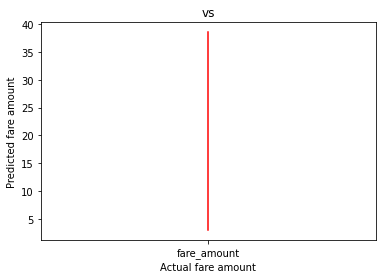

In [54]:
%matplotlib inline

plt.scatter(y_test,y_result,color = "black")

x0 = min(y_test)
x1 = max(y_test)
y0 = min(y_result)
y1 = max(y_result)
plt.plot([x0,x1],[y0,y1],color="red")

plt.xlabel("Actual fare amount")
plt.ylabel("Predicted fare amount")
plt.title("vs")
plt.show()

#  AIC 

In [57]:
import time
from sklearn.linear_model import LassoLarsIC
model_aic = LassoLarsIC(criterion='aic')
model_aic.fit(X, Y)
alpha_aic_ = model_aic.alpha_
alpha_aic_ 

0.0